# Sales Data analysis Project

#### First Lets load the raw data in this notebook

In [1]:
# we can open the file using with statement as well or we can load it using the pandas library
 ## with open(r"C:\Users\aneee\Downloads\superstore_sales_raw.xlsx") as readd:
     ## rx = readd.read()
     ## print(rx)

In [2]:
# lets load the libraries that are to be required 
import pandas as pd
# imprt numpy as np
# we wont be importing numpy for now because we do have a numpy functionality in pandas but will be ahead if required
from matplotlib import pyplot as plt

In [3]:
# lets import the raw data from pandas then where we will be working up

# we have 2 important tables there so lets import one table Orders

our_order_data = pd.read_excel(r'C:\Users\aneee\Downloads\superstore_sales_raw.xlsx' , 'Orders')
our_order_data.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,443.760,0.0000,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,130.086,13.0086,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,74.290,0.0000,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,49.685,24.8425,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,118.370,11.8370,37.770,4.70,Medium,2011


In [4]:
## our_order_data
our_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                51290 non-null  object        
 1   order_date              51290 non-null  datetime64[ns]
 2   ship_date               51290 non-null  datetime64[ns]
 3   ship_mode               51290 non-null  object        
 4   customer_name           51290 non-null  object        
 5   segment                 51290 non-null  object        
 6   state                   51290 non-null  object        
 7   country                 51290 non-null  object        
 8   market                  51290 non-null  object        
 9   region                  51290 non-null  object        
 10  product_id              51290 non-null  object        
 11  category                51290 non-null  object        
 12  sub_category            51290 non-null  object

In [5]:
# we have 2 important tables there so lets import one table Returns
our_return_data = pd.read_excel(r'C:\Users\aneee\Downloads\superstore_sales_raw.xlsx' , 'Returns')
our_return_data.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [6]:
our_return_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


### Now transforming the data 

In [7]:
# Since we have 2 datframe tables now, then we will be moving towards the transformation of our data
# combining the two tables now

final_data = our_order_data.merge(our_return_data, left_on = ['order_id', 'market'] , right_on = ['Order ID','Market'] , how = 'left')

In [8]:
final_data
# we here have sucessfully merged the data we wanted

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Order ID,Market
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,0.0,443.760,0.0000,106.1400,35.460,Medium,2011,NaN,NaN,NaN
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,NaN,NaN,NaN
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,0.0,74.290,0.0000,29.6400,8.170,High,2011,NaN,NaN,NaN
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,0.5,49.685,24.8425,-26.0550,4.820,High,2011,NaN,NaN,NaN
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,0.2,14.794,2.9588,4.5188,0.890,Medium,2014,NaN,NaN,NaN
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,0.0,4.480,0.0000,0.4200,0.490,Medium,2014,NaN,NaN,NaN
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,0.0,26.750,0.0000,12.3600,0.350,Medium,2014,NaN,NaN,NaN
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,0.0,7.319,0.0000,0.5600,0.199,Medium,2014,Yes,MX-2014-114783,LATAM


In [9]:
# Lets check if there are any duplicate data in our data frame or not.

final_data.duplicated().groupby(final_data.duplicated()).count()

# so there were no duplicate encountered but if there was we could have used 

final_data.drop_duplicates()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Order ID,Market
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,0.0,443.760,0.0000,106.1400,35.460,Medium,2011,NaN,NaN,NaN
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,NaN,NaN,NaN
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,0.0,74.290,0.0000,29.6400,8.170,High,2011,NaN,NaN,NaN
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,0.5,49.685,24.8425,-26.0550,4.820,High,2011,NaN,NaN,NaN
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,0.2,14.794,2.9588,4.5188,0.890,Medium,2014,NaN,NaN,NaN
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,0.0,4.480,0.0000,0.4200,0.490,Medium,2014,NaN,NaN,NaN
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,0.0,26.750,0.0000,12.3600,0.350,Medium,2014,NaN,NaN,NaN
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,0.0,7.319,0.0000,0.5600,0.199,Medium,2014,Yes,MX-2014-114783,LATAM


### Cleaning the final data

In [10]:
# we have two unwanted columns orders ID and Market that derieved from the return table while merging the data
# lets remove those unwanted columns and make our dataframe more clean

final_data.drop (columns = ['Order ID', 'Market'], inplace = True)

In [11]:
final_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408.300,2,0.0,443.760,0.0000,106.1400,35.460,Medium,2011,NaN
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120.366,3,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,NaN
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66.120,4,0.0,74.290,0.0000,29.6400,8.170,High,2011,NaN
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,44.865,3,0.5,49.685,24.8425,-26.0550,4.820,High,2011,NaN
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,113.670,5,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,13.904,2,0.2,14.794,2.9588,4.5188,0.890,Medium,2014,NaN
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,3.990,1,0.0,4.480,0.0000,0.4200,0.490,Medium,2014,NaN
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,26.400,3,0.0,26.750,0.0000,12.3600,0.350,Medium,2014,NaN
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,7.120,1,0.0,7.319,0.0000,0.5600,0.199,Medium,2014,Yes


In [12]:
# we deleted the columns and clean the data
# so, lets check for the null values and do some cleaning

final_data['Returned'].isnull().groupby(final_data['Returned']).count()

# so we have the nulls in returned status lets add Not_returned for null 

Returned
Yes    2243
Name: Returned, dtype: int64

In [13]:
final_data['Returned'].fillna('Not_returned',inplace = True)

In [14]:
# checking and grouping returned status out of the data that has been in Returned columns.
final_data.groupby(['Returned']).count()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year
Returned,,,,,,,,,,,,,,,,,,,,,
Not_returned,49047,49047,49047,49047,49047,49047,49047,49047,49047,49047,...,49047,49047,49047,49047,49047,49047,49047,49047,49047,49047
Yes,2243,2243,2243,2243,2243,2243,2243,2243,2243,2243,...,2243,2243,2243,2243,2243,2243,2243,2243,2243,2243


In [15]:
# we have a yes value so we are going to replace it by Returned_order to give meaningful info
final_data['Returned'].replace('Yes','Returned_order',inplace = True)

In [16]:
final_data['Returned']

0          Not_returned
1          Not_returned
2          Not_returned
3          Not_returned
4          Not_returned
              ...      
51285      Not_returned
51286      Not_returned
51287      Not_returned
51288    Returned_order
51289      Not_returned
Name: Returned, Length: 51290, dtype: object

In [17]:
# as looking after the data we dont require state and region as for now.

final_data.drop(columns = ['state','region'],inplace =True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                51290 non-null  object        
 1   order_date              51290 non-null  datetime64[ns]
 2   ship_date               51290 non-null  datetime64[ns]
 3   ship_mode               51290 non-null  object        
 4   customer_name           51290 non-null  object        
 5   segment                 51290 non-null  object        
 6   country                 51290 non-null  object        
 7   market                  51290 non-null  object        
 8   product_id              51290 non-null  object        
 9   category                51290 non-null  object        
 10  sub_category            51290 non-null  object        
 11  product_name            51290 non-null  object        
 12  sales                   51290 non-null  float6

In [18]:
# here we have some missing calculated columns like the final sales amount, shippment days
final_data['Final Sales Amount'] = final_data['total_without_discount']-final_data['Discount_amount']

final_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,quantity,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,...,2,0.0,443.760,0.0000,106.1400,35.460,Medium,2011,Not_returned,443.7600
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,OFF-SU-10000618,Office Supplies,...,3,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,Not_returned,117.0774
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,...,4,0.0,74.290,0.0000,29.6400,8.170,High,2011,Not_returned,74.2900
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Sweden,EU,OFF-PA-10001492,Office Supplies,...,3,0.5,49.685,24.8425,-26.0550,4.820,High,2011,Not_returned,24.8425
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10003447,Furniture,...,5,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,Not_returned,106.5330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,United States,US,OFF-BI-10002103,Office Supplies,...,2,0.2,14.794,2.9588,4.5188,0.890,Medium,2014,Not_returned,11.8352
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,...,1,0.0,4.480,0.0000,0.4200,0.490,Medium,2014,Not_returned,4.4800
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Nicaragua,LATAM,OFF-LA-10004182,Office Supplies,...,3,0.0,26.750,0.0000,12.3600,0.350,Medium,2014,Not_returned,26.7500
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Mexico,LATAM,OFF-LA-10000413,Office Supplies,...,1,0.0,7.319,0.0000,0.5600,0.199,Medium,2014,Returned_order,7.3190


In [19]:
# for the shipment days we need to difference the order data and ship date, 
# for the difference finding in dates we needed the numpy libraray for faster and reliable calculation
# numpy also provides the float value to exactly tracking the days with hours so we will be using numpy.

import numpy as np

final_data['Shipment Days'] = final_data['ship_date']-final_data['order_date']

final_data['Shipment Days']=final_data['Shipment Days']/np.timedelta64(1,'D')



In [20]:
final_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,...,0.0,443.760,0.0000,106.1400,35.460,Medium,2011,Not_returned,443.7600,5.0
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,OFF-SU-10000618,Office Supplies,...,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,Not_returned,117.0774,7.0
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,...,0.0,74.290,0.0000,29.6400,8.170,High,2011,Not_returned,74.2900,4.0
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Sweden,EU,OFF-PA-10001492,Office Supplies,...,0.5,49.685,24.8425,-26.0550,4.820,High,2011,Not_returned,24.8425,4.0
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10003447,Furniture,...,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,Not_returned,106.5330,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,United States,US,OFF-BI-10002103,Office Supplies,...,0.2,14.794,2.9588,4.5188,0.890,Medium,2014,Not_returned,11.8352,4.0
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,...,0.0,4.480,0.0000,0.4200,0.490,Medium,2014,Not_returned,4.4800,5.0
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Nicaragua,LATAM,OFF-LA-10004182,Office Supplies,...,0.0,26.750,0.0000,12.3600,0.350,Medium,2014,Not_returned,26.7500,2.0
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Mexico,LATAM,OFF-LA-10000413,Office Supplies,...,0.0,7.319,0.0000,0.5600,0.199,Medium,2014,Returned_order,7.3190,6.0


In [21]:

# changing the shipment days which is in float to integer 

final_data['Shipment Days'] = final_data['Shipment Days'].astype('int')
final_data.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,...,0.0,443.760,0.0000,106.140,35.46,Medium,2011,Not_returned,443.7600,5
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,OFF-SU-10000618,Office Supplies,...,0.1,130.086,13.0086,36.036,9.72,Medium,2011,Not_returned,117.0774,7
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,...,0.0,74.290,0.0000,29.640,8.17,High,2011,Not_returned,74.2900,4
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Sweden,EU,OFF-PA-10001492,Office Supplies,...,0.5,49.685,24.8425,-26.055,4.82,High,2011,Not_returned,24.8425,4
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10003447,Furniture,...,0.1,118.370,11.8370,37.770,4.70,Medium,2011,Not_returned,106.5330,7


In [22]:
# so we have the column field that is required for our data analysis 

# we successfully cleaned and transform the raw data into meaningful information providing data frame

# we also dealt with the null data , Now going for the exploratory data analysis


## Exploratory Data Analysis of Sales

#### what was the total revenue generated on the complete sales . i.e. return status as Not_returned

In [23]:
total_complete_sales_revenue = final_data['Final Sales Amount'].loc[final_data['Returned'] == 'Not_returned'].sum()
total_complete_sales_revenue

11856501.5867564

#### what was the revenue for the refunded orders

In [24]:
Returned_revenue = final_data ['Final Sales Amount'].loc[final_data['Returned'] == 'Returned_order'].sum()
Returned_revenue

648453.27794544

 #### Calculate the profit and group it by the order status to track profit

In [25]:
Profit_made = final_data['profit'].groupby(final_data['Returned']).sum().round(3)
Profit_made

Returned
Not_returned      1372521.960
Returned_order      96512.861
Name: profit, dtype: float64

#### Sales made in each market that were successful as well as unsuccessful ( partation of 2 status also would be good)

In [26]:
Sales_per_market = final_data ['Final Sales Amount'].groupby([final_data['market'],final_data['Returned']]).sum(). round(3)

Sales_per_market

market  Returned      
APAC    Not_returned      3266326.676
        Returned_order     274190.199
Africa  Not_returned       824117.191
Canada  Not_returned        74333.800
EMEA    Not_returned       808058.631
EU      Not_returned      2719486.077
        Returned_order     208610.661
LATAM   Not_returned      1984926.481
        Returned_order     165652.418
US      Not_returned      2179252.731
Name: Final Sales Amount, dtype: float64

#### Number of orders that were placed ( partation it by good order and bad order)

In [27]:
Number_of_orders = final_data['Returned'].groupby(final_data['Returned']).count()
Number_of_orders

Returned
Not_returned      49047
Returned_order     2243
Name: Returned, dtype: int64

#### What was the average discount over different countries

In [28]:
Discount_average = final_data['Discount_amount'].groupby(final_data['country']).mean().sort_values(ascending = False)
Discount_average

country
Portugal       117.949786
Lithuania      108.048668
Pakistan       107.397762
Netherlands     96.677868
Ireland         88.240810
                  ...    
Guinea           0.000000
Guadeloupe       0.000000
Ghana            0.000000
Georgia          0.000000
Libya            0.000000
Name: Discount_amount, Length: 147, dtype: float64

#### Provide the amount made on sucsessful sales in different countries 

In [29]:
Amount_succcess_by_different_country = final_data['Final Sales Amount'].loc[final_data['Returned'] == 'Not_returned'].groupby(final_data['country']).sum()

Amount_succcess_by_different_country                                                                            

country
Afghanistan    22660.960000
Albania         4586.690000
Algeria        39818.000000
Angola         27972.400000
Argentina      36041.069747
                   ...     
Venezuela      16134.973073
Vietnam        53038.471240
Yemen            825.702600
Zambia         29102.700000
Zimbabwe        1272.397500
Name: Final Sales Amount, Length: 147, dtype: float64

#### Provide the profit of each market for the complete sales.

In [30]:
Profit_per_market = final_data['profit'].groupby(final_data['market']).sum().sort_values(ascending = True)
Profit_per_market

market
Canada     17817.39000
EMEA       43897.97100
Africa     88871.63100
LATAM     221643.48708
US        286397.02170
EU        372829.74150
APAC      437577.57900
Name: profit, dtype: float64

#### Provide the average shipping cost in different markets 

In [31]:
Average_shiping_cost = final_data['shipping_cost'].groupby(final_data['market']).mean().sort_values(ascending = False)
Average_shiping_cost

market
APAC      35.190430
EU        30.942235
US        23.831678
LATAM     22.744668
Canada    19.285495
Africa    19.215058
EMEA      17.573221
Name: shipping_cost, dtype: float64

#### list all the sales history / orders for Joseph Holt 

In [32]:
Joseph_Holt_data = final_data.loc[final_data['customer_name'] == 'Joseph Holt']

Joseph_Holt_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,OFF-SU-10000618,Office Supplies,...,0.1,130.086,13.0086,36.0360,9.720,Medium,2011,Not_returned,117.0774,7
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10003447,Furniture,...,0.1,118.370,11.8370,37.7700,4.700,Medium,2011,Not_returned,106.5330,7
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,APAC,OFF-PA-10001968,Office Supplies,...,0.1,57.042,5.7042,15.3420,1.800,Medium,2011,Not_returned,51.3378,7
1952,MX-2011-131856,2011-05-03,2011-05-07,Standard Class,Joseph Holt,Consumer,Nicaragua,LATAM,OFF-SU-10002169,Office Supplies,...,0.0,62.591,0.0000,20.2200,7.931,High,2011,Not_returned,62.5910,4
1953,MX-2011-131856,2011-05-03,2011-05-07,Standard Class,Joseph Holt,Consumer,Nicaragua,LATAM,OFF-PA-10000935,Office Supplies,...,0.0,70.292,0.0000,4.9800,7.892,High,2011,Not_returned,70.2920,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49289,CA-2014-135860,2014-12-02,2014-12-08,Standard Class,Joseph Holt,Consumer,United States,US,OFF-BI-10003274,Office Supplies,...,0.0,17.290,0.0000,7.4824,1.370,Medium,2014,Not_returned,17.2900,6
49657,IN-2014-84780,2014-12-08,2014-12-10,Second Class,Joseph Holt,Consumer,New Zealand,APAC,OFF-SU-10002831,Office Supplies,...,0.0,112.990,0.0000,31.4400,11.230,High,2014,Not_returned,112.9900,2
50259,IN-2014-84353,2014-12-16,2014-12-20,Standard Class,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10000669,Furniture,...,0.0,33.950,0.0000,2.5200,2.390,Medium,2014,Returned_order,33.9500,4
50536,ES-2014-1728888,2014-12-20,2014-12-25,Standard Class,Joseph Holt,Consumer,France,EU,OFF-ST-10003764,Office Supplies,...,0.1,112.114,11.2114,43.9740,5.140,Medium,2014,Not_returned,100.9026,5


#### What was the customer name with order_id IT-2011-3647632	

In [33]:
cust_name_with_IT_2011_3647632 = final_data['customer_name'].loc[final_data['order_id'] == 'IT-2011-3647632']

cust_name_with_IT_2011_3647632

3    Eugene Moren
Name: customer_name, dtype: object

#### calculate the number of sales done in USA , Canada , Autralia , India

In [34]:
Sales_in_listed_country = final_data['Final Sales Amount'].loc[final_data['country'].isin(['United States','Canada','Australia','India'])].groupby(final_data['country']).sum()

Sales_in_listed_country.round(3)

country
Australia         890761.804
Canada             74333.800
India             645213.738
United States    2179252.731
Name: Final Sales Amount, dtype: float64

#### Calculate the sum of sales done in EU market and partation it by return status to track the how much complete

In [35]:
EU_sales = final_data['Final Sales Amount'].loc[final_data['market'] == 'EU'].sum()
EU_sales

2928096.7373749996

#### What was the total profit amount made through the sales 

In [36]:
Total_acutal_profit = final_data['profit'].loc[final_data['Returned'] == 'Not_returned'].sum()
Total_acutal_profit

1372521.9598

#### What was the average shipping cost all over the market

In [37]:
Average_shipping_cost = final_data['shipping_cost'].groupby(final_data['market']).mean()
Average_shipping_cost

market
APAC      35.190430
Africa    19.215058
Canada    19.285495
EMEA      17.573221
EU        30.942235
LATAM     22.744668
US        23.831678
Name: shipping_cost, dtype: float64

#### Revenue Generate each year to track what is the sales going on.

In [38]:
Revenue_each_year = final_data['Final Sales Amount'].groupby(final_data['year']).sum()
Revenue_each_year.round(3)

year
2011    2216173.339
2012    2653030.354
2013    3375432.651
2014    4260318.521
Name: Final Sales Amount, dtype: float64

#### What were the top 10 customers who are maximum profit provider in USA for complete sales. display the customer name , segment , order id and profit amount also count the order.

In [39]:
top_10_usa_profit_giver = final_data[['customer_name','segment','order_id','profit']].loc[final_data['country'] == 'United States'].groupby([final_data['customer_name'],final_data['segment'],final_data['order_id']]).sum().sort_values(by = 'profit',ascending = False)
top_10_usa_profit_giver.head(10)

,,,profit
customer_name,segment,order_id,
Tamara Chand,Corporate,CA-2013-118689,8762.3891
Raymond Buch,Consumer,CA-2014-140151,6734.4720
Hunter Lopez,Consumer,CA-2014-166709,5039.9856
Adrian Barton,Consumer,CA-2013-117121,4946.3700
Sanjit Chand,Consumer,CA-2011-116904,4668.6935
Tom Ashbrook,Home Office,CA-2014-127180,4597.1657
Christopher Martinez,Consumer,CA-2012-145352,3192.0682
Sanjit Engle,Consumer,CA-2013-158841,2825.2862
Daniel Raglin,Home Office,US-2013-140158,2640.4798


#### Give the top 10 cutsomers that has complete order and provided highest sales amount overall

In [40]:
top_10_cust = final_data['Final Sales Amount'].loc[final_data['Returned']== 'Not_returned'].groupby(final_data['customer_name']).sum().sort_values(ascending = False)

top_10_cust.head(10)

customer_name
Tom Ashbrook          38574.750100
Tamara Chand          36715.791474
Greg Tran             34915.657205
Christopher Conant    33055.911260
Penelope Sewall       30261.340772
Fred Hopkins          29881.045436
Hunter Lopez          29785.996894
Natalie Fritzler      29694.017325
Jane Waco             29516.171039
Raymond Buch          29272.208058
Name: Final Sales Amount, dtype: float64

#### how much worth order given by Eugene Moren	

In [41]:
order_value_of_Eugene_Moren = final_data['Final Sales Amount'].loc[final_data['customer_name']== 'Eugene Moren'].groupby(final_data['segment']).sum()
order_value_of_Eugene_Moren

segment
Home Office    23589.966254
Name: Final Sales Amount, dtype: float64

#### What was the difference in total_without discount and final_sales_amount

In [42]:
diff_without_discount = final_data['total_without_discount'].sum() - final_data['Final Sales Amount'].sum()
diff_without_discount

1490362.7485781573

#### What segment had how many sales order

In [43]:
sales_order_by_segment = final_data['Final Sales Amount'].groupby(final_data['segment']).count()
sales_order_by_segment

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: Final Sales Amount, dtype: int64

#### Revenue generated by each shipmode 

In [44]:
revenue_by_ship_mode = final_data['Final Sales Amount'].groupby(final_data['ship_mode']).sum()
revenue_by_ship_mode.round(3)

ship_mode
First Class       1900918.781
Same Day           692086.608
Second Class      2582030.334
Standard Class    7329919.141
Name: Final Sales Amount, dtype: float64

#### Which 10 customer has the maximum value order in a sales

In [45]:
max_value_order_10 = final_data[['customer_name','Final Sales Amount']].groupby(final_data['customer_name']).sum()
max_value_order_10.sort_values(by= 'Final Sales Amount',ascending = False).head(10)

,Final Sales Amount
customer_name,
Tom Ashbrook,38574.750100
Tamara Chand,36715.791474
Greg Tran,35105.844305
Christopher Conant,33185.293660
Bart Watters,32626.709865
Fred Hopkins,31719.339461
Penelope Sewall,31037.920772
Natalie Fritzler,30351.517325
Sanjit Engle,30289.520340


#### Market revenue over different sub- category 

In [46]:
revenue_of_sub_category = final_data['Final Sales Amount'].groupby(final_data['sub_category']).sum()

revenue_of_sub_category.round(2).sort_values(ascending = True)

sub_category
Labels           75266.72
Fasteners        84134.11
Envelopes       173406.97
Supplies        246029.06
Paper           252039.53
Furnishings     383849.98
Art             386104.50
Binders         443775.11
Tables          647811.44
Machines        744016.43
Accessories     770582.14
Appliances     1017898.89
Storage        1128046.18
Bookcases      1453893.28
Chairs         1455233.29
Copiers        1539214.60
Phones         1703652.63
Name: Final Sales Amount, dtype: float64

#### customers with order more than 7000 at single time

In [47]:
cust_with_more_than_7000 = final_data.loc[final_data['Final Sales Amount'] > 7000]
cust_with_more_than_7000

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
548,ID-2011-64599,2011-02-10,2011-02-15,Standard Class,Carol Adams,Corporate,Japan,APAC,TEC-PH-10000303,Technology,...,0.0,7412.44000,0.00000,2939.3100,413.80000,Medium,2011,Returned_order,7412.44000,5
1103,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,Sean Miller,Home Office,United States,US,TEC-MA-10002412,Technology,...,0.5,22662.76650,11331.38325,-1811.0784,24.28650,Medium,2011,Not_returned,11331.38325,5
3764,CA-2011-143917,2011-07-25,2011-07-27,Second Class,Ken Lonsdale,Consumer,United States,US,OFF-SU-10000151,Office Supplies,...,0.0,8204.42000,0.00000,327.5060,16.77000,High,2011,Not_returned,8204.42000,2
5522,CA-2011-116904,2011-09-23,2011-09-28,Standard Class,Sanjit Chand,Consumer,United States,US,OFF-BI-10001120,Office Supplies,...,0.0,10105.56000,0.00000,4630.4755,655.61000,Medium,2011,Not_returned,10105.56000,5
8216,CA-2011-145541,2011-12-14,2011-12-21,Standard Class,Tom Boeckenhauer,Consumer,United States,US,TEC-MA-10001127,Technology,...,0.0,7499.51000,0.00000,2239.9872,499.55000,Medium,2011,Not_returned,7499.51000,7
20693,CA-2013-158841,2013-02-02,2013-02-04,Second Class,Sanjit Engle,Consumer,United States,US,TEC-MA-10001127,Technology,...,0.0,8767.78000,0.00000,2799.9840,17.83000,Critical,2013,Not_returned,8767.78000,2
22483,US-2013-107440,2013-04-17,2013-04-21,Standard Class,Bill Shonely,Corporate,United States,US,TEC-MA-10001047,Technology,...,0.0,9616.84000,0.00000,2365.9818,516.91000,Medium,2013,Not_returned,9616.84000,4
29530,CA-2013-118689,2013-10-03,2013-10-10,Standard Class,Tamara Chand,Corporate,United States,US,TEC-CO-10004722,Technology,...,0.0,17849.02000,0.00000,8399.9760,349.07000,Medium,2013,Not_returned,17849.02000,7
33011,CA-2013-117121,2013-12-18,2013-12-22,Standard Class,Adrian Barton,Consumer,United States,US,OFF-BI-10000545,Office Supplies,...,0.0,10391.44000,0.00000,4946.3700,498.70000,Medium,2013,Not_returned,10391.44000,4
36239,CA-2014-140151,2014-03-24,2014-03-26,First Class,Raymond Buch,Consumer,United States,US,TEC-CO-10004722,Technology,...,0.0,14019.96054,0.00000,6719.9808,20.00054,Medium,2014,Not_returned,14019.96054,2


####  top 7 highest sale details of customers of canada where the sales is completed

In [48]:
sales_on_cad_complete = final_data.loc[(final_data['Returned'] == 'Not_returned') & (final_data['country']== 'Canada')].sort_values(by = 'Final Sales Amount', ascending = False)

sales_on_cad_complete.head(7)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
50602,CA-2014-6550,2014-12-23,2014-12-25,Second Class,Stuart Van,Corporate,Canada,Canada,TEC-MOT-10000554,Technology,...,0.0,4410.44,0.0,1159.02,546.56,Critical,2014,Not_returned,4410.44,2
27411,CA-2013-1260,2013-08-24,2013-08-26,Second Class,Dianna Wilson,Home Office,Canada,Canada,TEC-HEW-10003829,Technology,...,0.0,2564.59,0.0,1112.40,294.25,Medium,2013,Not_returned,2564.59,2
13409,CA-2012-8790,2012-07-07,2012-07-09,First Class,Rob Haberlin,Consumer,Canada,Canada,OFF-BRE-10002706,Office Supplies,...,0.0,2073.85,0.0,593.64,274.75,High,2012,Not_returned,2073.85,2
33273,CA-2013-8350,2013-12-22,2013-12-24,Second Class,Shahid Shariari,Consumer,Canada,Canada,OFF-ROG-10002294,Office Supplies,...,0.0,1938.07,0.0,272.52,233.11,High,2013,Not_returned,1938.07,2
48887,CA-2014-4170,2014-11-27,2014-12-02,Standard Class,Dan Campbell,Consumer,Canada,Canada,FUR-SAF-10002846,Furniture,...,0.0,1833.28,0.0,70.32,75.28,Medium,2014,Not_returned,1833.28,5
13186,CA-2012-5670,2012-06-29,2012-07-03,Second Class,Bart Folk,Consumer,Canada,Canada,TEC-HEW-10003829,Technology,...,0.0,1698.40,0.0,741.60,184.84,High,2012,Not_returned,1698.40,4
35115,CA-2014-5120,2014-02-18,2014-02-23,Second Class,Jim Karlsson,Consumer,Canada,Canada,TEC-SAN-10000235,Technology,...,0.0,1632.45,0.0,646.38,93.09,Medium,2014,Not_returned,1632.45,5


#### Find the detailed sales of cutomer Erica Bern

In [49]:
cust_Erica_Bern_data = final_data.loc[final_data['customer_name'] == 'Erica Bern']

cust_Erica_Bern_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
2728,MX-2011-115784,2011-06-07,2011-06-14,Standard Class,Erica Bern,Corporate,Mexico,LATAM,OFF-BI-10002977,Office Supplies,...,0.0,9.422,0.0000,4.2400,0.742,Low,2011,Not_returned,9.4220,7
3189,ZI-2011-8150,2011-06-23,2011-06-29,Standard Class,Erica Bern,Corporate,Zimbabwe,Africa,FUR-BAR-10003465,Furniture,...,0.7,162.163,113.5141,-275.7570,19.540,Low,2011,Not_returned,48.6489,6
3208,ZI-2011-8150,2011-06-23,2011-06-29,Standard Class,Erica Bern,Corporate,Zimbabwe,Africa,OFF-TEN-10001160,Office Supplies,...,0.7,17.267,12.0869,-32.8230,0.860,Low,2011,Not_returned,5.1801,6
3625,SG-2011-9120,2011-07-18,2011-07-22,Standard Class,Erica Bern,Corporate,Senegal,Africa,OFF-FEL-10004665,Office Supplies,...,0.0,1810.800,0.0000,431.0400,152.160,Medium,2011,Not_returned,1810.8000,4
3741,MX-2011-147585,2011-07-23,2011-07-29,Standard Class,Erica Bern,Corporate,Guatemala,LATAM,OFF-ST-10000028,Office Supplies,...,0.0,141.720,0.0000,32.2800,17.460,Low,2011,Not_returned,141.7200,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51259,MX-2014-116267,2014-12-31,2015-01-03,Second Class,Erica Bern,Corporate,Brazil,LATAM,TEC-AC-10003454,Technology,...,0.0,82.112,0.0000,28.4200,7.312,High,2014,Not_returned,82.1120,3
51261,MX-2014-116267,2014-12-31,2015-01-03,Second Class,Erica Bern,Corporate,Brazil,LATAM,OFF-BI-10003653,Office Supplies,...,0.0,65.076,0.0000,16.4400,6.336,High,2014,Not_returned,65.0760,3
51268,MX-2014-116267,2014-12-31,2015-01-03,Second Class,Erica Bern,Corporate,Brazil,LATAM,OFF-EN-10004560,Office Supplies,...,0.0,26.764,0.0000,7.4400,4.164,High,2014,Not_returned,26.7640,3
51281,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,United States,US,OFF-BI-10004632,Office Supplies,...,0.2,22.780,4.5560,6.4750,2.060,Medium,2014,Not_returned,18.2240,4


#### Average shipment days for India

In [50]:
avg_ship_day_india = final_data['Shipment Days'].loc[final_data['country']=='India'].mean()
avg_ship_day_india

3.9742765273311895

#### top 5 customers details having the most order value cancellation

In [51]:
top_5_order_cancellation = final_data.loc[final_data['Returned']== 'Returned_order'].sort_values(by = 'Final Sales Amount',ascending = False)
top_5_order_cancellation.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,market,product_id,category,...,discount,total_without_discount,Discount_amount,profit,shipping_cost,order_priority,year,Returned,Final Sales Amount,Shipment Days
43831,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,Patrick Jones,Corporate,Italy,EU,OFF-AP-10004512,Office Supplies,...,0.0,8736.900,0.0000,3979.080,778.32,Low,2014,Returned_order,8736.9000,6
548,ID-2011-64599,2011-02-10,2011-02-15,Standard Class,Carol Adams,Corporate,Japan,APAC,TEC-PH-10000303,Technology,...,0.0,7412.440,0.0000,2939.310,413.80,Medium,2011,Returned_order,7412.4400,5
46919,IN-2014-10979,2014-10-31,2014-11-04,Standard Class,Meg O'Connel,Home Office,Japan,APAC,OFF-AP-10001931,Office Supplies,...,0.0,4620.470,0.0000,1722.480,314.15,Medium,2014,Returned_order,4620.4700,4
20727,IN-2013-77878,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Australia,APAC,FUR-CH-10003950,Furniture,...,0.1,4633.025,463.3025,1288.765,923.63,Critical,2013,Returned_order,4169.7225,2
5931,IN-2011-86278,2011-10-06,2011-10-11,Standard Class,Nicole Hansen,Corporate,New Zealand,APAC,FUR-TA-10000022,Furniture,...,0.0,4077.450,0.0000,886.680,382.77,High,2011,Returned_order,4077.4500,5


### Finding the correlation in our sales data

In [52]:
# lets see for all the correlation among each numeric values column.

final_data.corr(method ='pearson')

# final_data.corr(method = 'kendall')

,sales,quantity,discount,total_without_discount,Discount_amount,profit,shipping_cost,year,Final Sales Amount,Shipment Days
sales,1.000000,0.313577,-0.086722,0.997626,0.494091,0.485939,0.768073,-0.002905,0.978274,-0.004660
quantity,0.313577,1.000000,-0.019875,0.316252,0.171058,0.104743,0.272649,-0.005049,0.306968,0.004347
discount,-0.086722,-0.019875,1.000000,-0.087854,0.278168,-0.316375,-0.079055,-0.005894,-0.156360,-0.001507
total_without_discount,0.997626,0.316252,-0.087854,1.000000,0.490075,0.483044,0.810345,-0.002995,0.981735,-0.019622
Discount_amount,0.494091,0.171058,0.278168,0.490075,1.000000,-0.322241,0.353052,-0.008454,0.315284,-0.017050
profit,0.485939,0.104743,-0.316375,0.483044,-0.322241,1.000000,0.357033,0.002661,0.596221,0.001543
shipping_cost,0.768073,0.272649,-0.079055,0.810345,0.353052,0.357033,1.000000,-0.003137,0.805164,-0.142823
year,-0.002905,-0.005049,-0.005894,-0.002995,-0.008454,0.002661,-0.003137,1.000000,-0.001416,-0.003427
Final Sales Amount,0.978274,0.306968,-0.156360,0.981735,0.315284,0.596221,0.805164,-0.001416,1.000000,-0.017641
Shipment Days,-0.004660,0.004347,-0.001507,-0.019622,-0.017050,0.001543,-0.142823,-0.003427,-0.017641,1.000000


In [53]:
# lets find correlation of the profit and discount
final_data['profit'].corr(final_data['Discount_amount'])

# so we can say the corelation is negative for profit and discount.
# increase in discount then the profit is affected negatively

-0.3222408369821026

Text(0, 0.5, 'Discount')

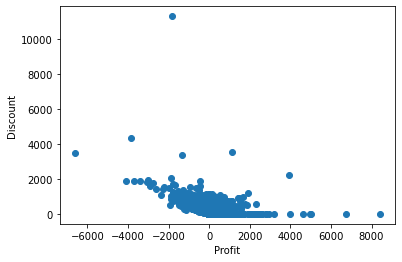

In [54]:
# lets plot the correlation we finded on profit and discount using matplotlib

plt.scatter(final_data['profit'],final_data['Discount_amount'])
plt.xlabel('Profit')
plt.ylabel('Discount')


### Visualization of our data

In [55]:
# for the visualization we will basically working on the matplotlib library which we have already imported above

#### Change in Sales over year

Text(0.5, 1.0, 'Rvenue over years')

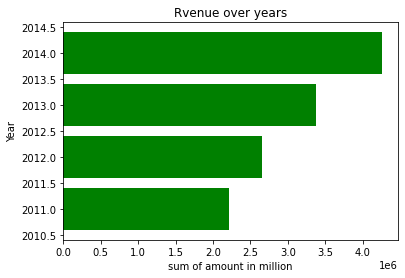

In [111]:
# Things to consider:

# here i break down the calculation for better understanding and making less complex in the visual part

# if you dont want to do seperately you can do on visulization code with using list() in arguments.

year = final_data['year'].unique()
year

final_amount = final_data['Final Sales Amount'].groupby(final_data['year']).sum().round(3)
final_amount

plt.barh(year, final_amount,color= 'green')
plt.ylabel('Year')
plt.xlabel('sum of amount in million')
plt.title('Rvenue over years')
 # if we want to remove le6 and have value then we could be using below code
   # plt.ticklabel_format(style='plain')


#### Profit made by each year

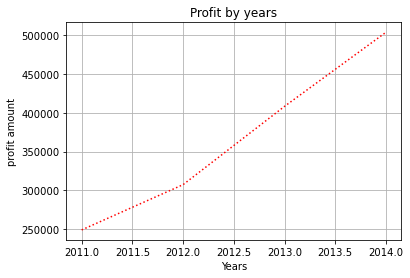

In [113]:
year = final_data['year'].unique()
year

profit_made = final_data['profit'].groupby(final_data['year']).sum().round(3)
profit_made

plt.plot(year, profit_made,color = 'red',linestyle = 'dotted')
plt.ylabel('profit amount')
plt.xlabel('Years')
plt.title('Profit by years')
plt.grid(True)
plt.show()

#### Count of order for each segment

Text(0.5, 0, 'Segment')

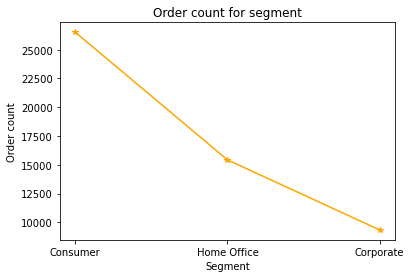

In [152]:
count_of_order = final_data['Returned'].groupby(final_data['segment']).count()
count_of_order

segments = final_data['segment'].unique()
segments

plt.plot(segments,count_of_order, color ='orange',marker= '*')
plt.title('Order count for segment')
plt.ylabel('Order count')
plt.xlabel('Segment')


#### Returned Status and non returned status revenue all over year

Text(0.5, 1.0, 'Revenue made on return status')

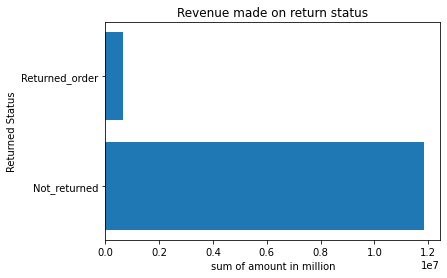

In [145]:
Returned_status = final_data['Returned'].unique()
Returned_status

final_amt = final_data['Final Sales Amount'].groupby(final_data['Returned']).sum().round(2)
final_amt

plt.barh( Returned_status, final_amt)
plt.xlabel('sum of amount in million')
plt.ylabel('Returned Status')
plt.title('Revenue made on return status')

#### display how much worth profit(on complete status) were made on each sub category 

Text(0.5, 1.0, 'Profit by sub_category')

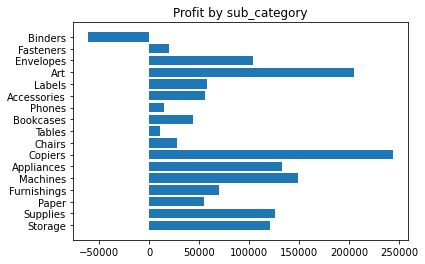

In [159]:
# lets try a list argument method

plt.barh(list(final_data['sub_category'].unique()),list(final_data['profit'].loc[final_data['Returned']== 'Not_returned'].groupby(final_data['sub_category']).sum()))

plt.title('Profit by sub_category')


#### Display the pie chart including segment for complete sales on complete sales and incomplete sales both

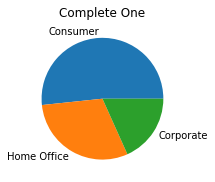

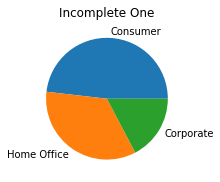

In [170]:
complete_part = final_data['Final Sales Amount'].loc[final_data['Returned']== 'Not_returned'].groupby(final_data['segment']).sum().round(2)
complete_part

incomplete_part = final_data['Final Sales Amount'].loc[final_data['Returned']== 'Returned_order'].groupby(final_data['segment']).sum().round(2)
incomplete_part


my_labels = final_data['segment'].unique()
my_labels

# so lets build a pie chart for complete
# if we are wanting the 2 chart in single figure so we will be using sub plot 

plt.subplot(1,2,1)
plt.pie(complete_part, labels = my_labels)
plt.title('Complete One')
plt.show()

plt.subplot(1,2,2)
plt.pie(incomplete_part, labels = my_labels)
plt.title('Incomplete One')
plt.show()

#### Provide the histograms based on sum of sales where the sales is complete and incomplete both on same figure

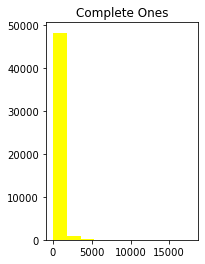

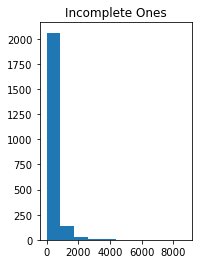

In [182]:
complete_ones = final_data['Final Sales Amount'].loc[final_data['Returned']== 'Not_returned'].round(2)
complete_ones

incomplete_ones = final_data['Final Sales Amount'].loc[final_data['Returned']== 'Returned_order'].round(2)
incomplete_ones

plt.subplot(1,2,1)
plt.hist(complete_ones,bins=10,color='yellow')
plt.title('Complete Ones')
plt.show()

plt.subplot(1,2,2)
plt.hist(incomplete_ones)
plt.title('Incomplete Ones')
plt.show()

#### stack line plot for order in each segment and returned count of each in same surface

Text(0.5, 0, 'Segment')

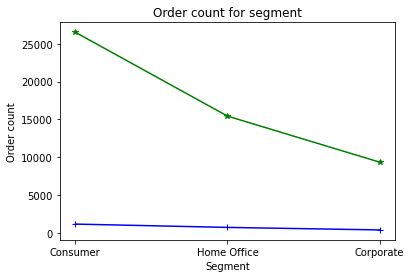

In [190]:
count_of_order = final_data['Returned'].groupby(final_data['segment']).count()
count_of_order

segments = final_data['segment'].unique()
segments

count_of_returned = final_data['Returned'].loc[final_data['Returned']=='Returned_order'].groupby(final_data['segment']).count()

plt.plot(segments,count_of_order, color ='green',marker= '*')
plt.plot(segments, count_of_returned, color = 'blue', marker = '+')
plt.title('Order count for segment')
plt.ylabel('Order count')
plt.xlabel('Segment')

### So we will be concluding our sales project here and move forward for dashoarding for better data insights